# Lab 5-2 특성 개수와 과대적합

## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

## 데이터 준비

In [2]:
df = pd.read_csv('../data/perch.csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [3]:
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 특성 추가

In [6]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)

PolynomialFeatures(degree=5, include_bias=False)

In [7]:
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

## 학습, 예측

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(train_poly, train_target)

LinearRegression()

In [10]:
lr.score(train_poly, train_target)

0.9999999999938143

In [11]:
lr.score(test_poly, test_target)

-144.40744532797535

## 시각화

In [58]:
train_poly[:,43]

array([ 10792.76929024,  21109.276672  ,  10620.54968832,   7693.79282784,
       396811.903104  ,  31147.52      , 575080.6896    , 603936.435375  ,
       713396.622848  ,  21109.276672  ,   8501.5732    ,  21109.276672  ,
        29651.816448  ,  61820.79365   , 755350.684312  , 602187.2768    ,
        32107.949568  ,  15992.728731  ,  61820.79365   , 664257.4976    ,
       234713.00905472,  49830.216174  , 430088.743406  ,   1501.52      ,
        24647.42702763,   3228.504075  , 353852.073757  , 581326.2       ,
        82284.44327936,  28429.193808  , 328536.        ,  19897.045056  ,
        25303.205763  ,  30976.        , 849857.536     ,  24015.45105   ,
        10242.517625  , 335835.380744  ,  19191.481364  ,  49954.83172864,
       571964.128092  , 310556.60088975])

In [26]:
perch_weight.shape

(56,)

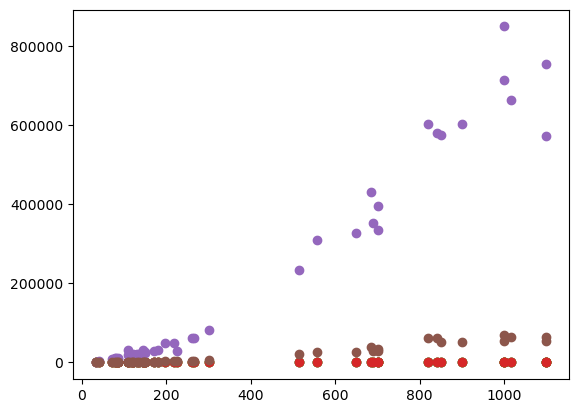

In [57]:
plt.scatter(x=train_target, y=train_poly[:,0])
plt.scatter(x=train_target, y=train_poly[:,1])
plt.scatter(x=train_target, y=train_poly[:,2])
plt.scatter(x=train_target, y=train_poly[:,3])
plt.scatter(x=train_target, y=train_poly[:,43])
plt.scatter(x=train_target, y=train_poly[:,52])

plt.show()